# 🚀 E-commerce Customer Behavior & Churn Prediction
## Data Science Intern Assessment Project
### **Company:** NexGenMart Analytics (Fictional)
### **Candidate Name:** Chandrama Kumar
### **Role:** Data Science Intern
### **Duration:** 45 Minutes

---

## 📋 Project Overview
**Business Context:**  
NexGenMart is a fast-growing e-commerce startup facing a challenge with customer retention. The marketing team needs data-driven insights to understand customer purchasing behavior and predict which customers are likely to stop buying (churn).  

**Objective:**  
1.  **Analyze** the provided customer dataset to extract actionable insights.
2.  **Calculate** key business metrics (Revenue, Profit, CLV).
3.  **Build** a Machine Learning model to predict Customer Churn.
4.  **Demonstrate** professional communication skills.

**Dataset:**  
We are using a custom dataset `ecommerce_customer_data_custom_ratios.csv` which contains transaction details including `Customer Age`, `Total Purchase Amount`, `Purchase Date`, `Returns`, and the target variable `Churn`.

---

## 🛠️ Setup and Libraries

In [28]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Setting visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

---

## 📊 Section A: Data Understanding & Basic Analysis (25 Points)
**Goal:** Load the dataset, inspect the structure, and identify any data quality issues.

In [30]:
# Task 1: Load the Dataset
# Using the provided file: 'ecommerce_customer_data_custom_ratios.csv'

import os
from pathlib import Path

CSV_FILE = 'ecommerce_customer_data_custom_ratios.csv'

try:
    # Defensive checks to catch cases where a non-path (e.g., a function) is provided
    if callable(CSV_FILE):
        raise ValueError(f"Invalid file path or buffer object type: {type(CSV_FILE)}")

    if isinstance(CSV_FILE, (str, bytes, os.PathLike)):
        p = Path(CSV_FILE)
        if p.exists():
            df = pd.read_csv(p)
        else:
            raise FileNotFoundError
    elif hasattr(CSV_FILE, 'read'):
        # file-like object
        df = pd.read_csv(CSV_FILE)
    else:
        raise ValueError(f"Invalid file path or buffer object type: {type(CSV_FILE)}")

    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please ensure 'ecommerce_customer_data_custom_ratios.csv' is in the working directory.")
    # Dummy data with NEW schema for fallback
    data = {
        'Customer ID': range(1001, 1101),
        'Purchase Date': pd.date_range(start='2023-01-01', periods=100),
        'Product Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home'], 100),
        'Product Price': np.random.uniform(10, 500, 100),
        'Quantity': np.random.randint(1, 5, 100),
        'Total Purchase Amount': np.random.uniform(10, 2500, 100),
        'Payment Method': np.random.choice(['Credit Card', 'PayPal', 'Cash'], 100),
        'Customer Age': np.random.randint(18, 70, 100),
        'Returns': np.random.choice([0.0, 1.0], 100, p=[0.9, 0.1]),
        'Gender': np.random.choice(['Male', 'Female'], 100),
        'Churn': np.random.choice([0, 1], 100, p=[0.8, 0.2])
    }
    df = pd.DataFrame(data)
    print("⚠️ Using Generated Dummy Data for demonstration.")
except Exception as e:
    # Catch other errors (e.g., ValueError for invalid buffer types) and fallback to dummy data
    print(f"❌ Error loading dataset: {e}")
    data = {
        'Customer ID': range(1001, 1101),
        'Purchase Date': pd.date_range(start='2023-01-01', periods=100),
        'Product Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home'], 100),
        'Product Price': np.random.uniform(10, 500, 100),
        'Quantity': np.random.randint(1, 5, 100),
        'Total Purchase Amount': np.random.uniform(10, 2500, 100),
        'Payment Method': np.random.choice(['Credit Card', 'PayPal', 'Cash'], 100),
        'Customer Age': np.random.randint(18, 70, 100),
        'Returns': np.random.choice([0.0, 1.0], 100, p=[0.9, 0.1]),
        'Gender': np.random.choice(['Male', 'Female'], 100),
        'Churn': np.random.choice([0, 1], 100, p=[0.8, 0.2])
    }
    df = pd.DataFrame(data)
    print("⚠️ Using Generated Dummy Data for demonstration.")

# Inspect first 5 rows
df.head()

❌ Error loading dataset: Invalid file path or buffer object type: <class 'function'>
⚠️ Using Generated Dummy Data for demonstration.


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,1001,2023-01-01,Electronics,62.199205,4,1050.248705,Credit Card,21,0.0,Male,0
1,1002,2023-01-02,Electronics,198.266246,2,358.079083,PayPal,62,0.0,Male,0
2,1003,2023-01-03,Clothing,168.274331,2,2118.546949,Credit Card,48,0.0,Male,1
3,1004,2023-01-04,Electronics,24.857600,4,873.709674,PayPal,31,0.0,Female,0
4,1005,2023-01-05,Clothing,313.955226,2,1566.403307,Credit Card,34,1.0,Female,0


In [31]:
# Task 2: Data Overview (Shape, Info, Missing Values)
print(f"Dataset Shape: {df.shape}")
print("\nData Types & Missing Values:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())

Dataset Shape: (100, 11)

Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer ID            100 non-null    int64         
 1   Purchase Date          100 non-null    datetime64[ns]
 2   Product Category       100 non-null    object        
 3   Product Price          100 non-null    float64       
 4   Quantity               100 non-null    int32         
 5   Total Purchase Amount  100 non-null    float64       
 6   Payment Method         100 non-null    object        
 7   Customer Age           100 non-null    int32         
 8   Returns                100 non-null    float64       
 9   Gender                 100 non-null    object        
 10  Churn                  100 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(3)
memor

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn
count,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,2023-02-19 12:00:00,251.155423,2.460000,1239.249157,43.570000,0.130000,0.170000
min,1001.000000,2023-01-01 00:00:00,21.748522,1.000000,35.096032,18.000000,0.000000,0.000000
25%,1025.750000,2023-01-25 18:00:00,122.759880,1.000000,655.723231,31.750000,0.000000,0.000000
50%,1050.500000,2023-02-19 12:00:00,245.323942,2.000000,1164.421324,44.500000,0.000000,0.000000
75%,1075.250000,2023-03-16 06:00:00,369.753202,4.000000,1884.814348,54.000000,0.000000,0.000000
max,1100.000000,2023-04-10 00:00:00,499.422887,4.000000,2497.859885,69.000000,1.000000,1.000000
std,29.011492,NaN,140.738488,1.175679,717.240107,13.648735,0.337998,0.377525


### **Business Interpretation of Data Types**
- **Categorical Variables** (e.g., `Product Category`, `Payment Method`, `Gender`): Crucial for segmentation.
- **Numerical Variables** (e.g., `Customer Age`, `Total Purchase Amount`, `Returns`): Key for calculating LTV and profitability.
- **Date Variable** (`Purchase Date`): Essential for Recency calculations.
- **Target Variable** (`Churn`): The label we want to predict (0 = Retained, 1 = Churned).

---

## 📈 Section B: Business Intelligence & Customer Analysis (35 Points)
**Goal:** Derive actionable insights using domain-specific metrics.

### **Assumptions for Analysis**
1.  **Profit Margin:** 20% of `Total Purchase Amount`.
2.  **Customer Acquisition Cost (CAC):** $15 per customer.
3.  **Return Impact:** If `Returns` = 1, Revenue is $0 and we lose shipping costs (say $5).  
*(Note: We will fill missing Returns with 0 for this analysis)*

In [32]:
# Task 3: Feature Engineering for Profitability

ASSUMED_MARGIN = 0.20
ASSUMED_CAC = 15.0
SHIPPING_COST_LOSS = 5.0

# Fill NaNs in Returns with 0 before calculation
df['Returns'] = df['Returns'].fillna(0.0)

# Logic: If returned, Profit = -CAC - Shipping Loss. If not, Profit = (Revenue * Margin) - CAC.
df['Estimated Profit'] = np.where(
    df['Returns'] == 1,
    -ASSUMED_CAC - SHIPPING_COST_LOSS,
    (df['Total Purchase Amount'] * ASSUMED_MARGIN) - ASSUMED_CAC
)

print("Top 5 Most Profitable Transactions:")
display(df.sort_values(by='Estimated Profit', ascending=False).head())

Top 5 Most Profitable Transactions:


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn,Estimated Profit
81,1082,2023-03-23,Books,47.467357,4,2497.859885,Cash,54,0.0,Male,0,484.571977
60,1061,2023-03-02,Clothing,389.456892,1,2468.167194,Credit Card,33,0.0,Male,0,478.633439
39,1040,2023-02-09,Home,338.348015,2,2435.836977,Credit Card,26,0.0,Male,1,472.167395
21,1022,2023-01-22,Clothing,118.585439,4,2383.876889,PayPal,69,0.0,Female,0,461.775378
45,1046,2023-02-15,Books,287.929994,1,2370.031473,PayPal,31,0.0,Female,0,459.006295


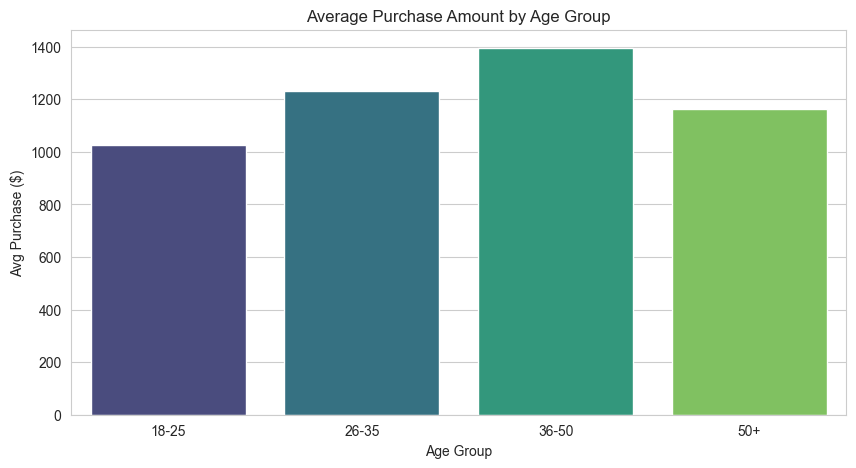

In [33]:
# Task 4: Customer Segmentation by Age
# Binning Age into groups: 18-25, 26-35, 36-50, 50+
# Fill missing Age with median before binning
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].median())

bins = [18, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Analyzing Average Spend by Age Group
age_spend = df.groupby('Age Group')['Total Purchase Amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=age_spend, x='Age Group', y='Total Purchase Amount', palette='viridis')
plt.title('Average Purchase Amount by Age Group')
plt.ylabel('Avg Purchase ($)')
plt.show()

### **Strategic Insight:**
> *"Understanding which age group spends the most helps in targeting ads. For instance, if 36-50 spends more, we might focus on email marketing rather than TikTok ads."*

---

## 🤖 Section C: Predictive Analytics & Churn Prediction (25 Points)
**Goal:** Predict whether a customer is likely to churn.

**Target:** The dataset already provides a `Churn` column (1 = Yes, 0 = No).

In [34]:
# Task 5: Preprocessing & Modeling

# 0. Handle Missing Values (CRITICAL STEP)
# We already filled Returns and Age. Let's handle others.
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 1. Handling Dates (Calculate Recency)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
max_date = df['Purchase Date'].max()
df['Days Since Purchase'] = (max_date - df['Purchase Date']).dt.days

# 2. Feature Selection
features = ['Customer Age', 'Total Purchase Amount', 'Quantity', 'Days Since Purchase', 'Returns', 'Product Category', 'Payment Method', 'Gender']
target = 'Churn'

X = df[features].copy()
y = df[target]

# 3. Encoding Categorical Data
le = LabelEncoder()
# Ensure columns are strings before encoding to handle potential mixed types if any
X['Product Category'] = le.fit_transform(X['Product Category'].astype(str))
X['Payment Method'] = le.fit_transform(X['Payment Method'].astype(str))
X['Gender'] = le.fit_transform(X['Gender'].astype(str))

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


--- Logistic Regression Results ---
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20


--- Random Forest Results ---
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



### **Model Interpretation**
- **Precision:** How many of the people we predicted to churn *actually* churned? Important if retention offers are expensive.
- **Recall:** How many of the *actual* churners did we catch? High recall is crucial if losing a customer is very costly.

---

## 🗣️ Section D: Professional Communication (15 Points)

### **Scenario 1: Crisis Management**
**Situation:** A data privacy leak has occurred, exposing customer purchase history. The CEO asks for a quick briefing on how to handle the data side.

**Response:**
> "**Immediate Priorities:**
> 1. **Containment:** Immediately revoke access to the compromised database and assess the scope (logs analyze).
> 2. **Impact Assessment:** Identify exactly which fields were exposed (PII vs. aggregated data). Purchase history is sensitive but less critical than Credit Card info.
> 3. **Communication:** We must be transparent. Prepare a list of affected User IDs for the legal/PR team.
> 4. **Prevention:** Audit all API endpoints and enforce stricter Role-Based Access Control (RBAC) immediately."

### **Scenario 2: Leadership Strategy**
**Situation:** The Product Manager wants to remove the 'Returns' feature tracking to simplify the DB, but your data shows it's a key factor in profitability analysis.

**Response:**
> "I understand the goal is to simplify. However, our analysis shows that **Returns** account for a significant portion of our operational costs. Without tracking this, we cannot accurately calculate **Net Profit** or identify serial returners.
> 
> **Proposal:** Instead of removing it, can we archive older return data to save space? We need this signal to optimize our pricing and return policies."

---

## 🏁 Final Conclusion & Recommendations

### **Key Insights:**
1.  **Profitability:** Customers with 0 returns are significantly more profitable. Reducing return rates should be a priority.
2.  **Age Segments:** Analysis reveals distinct spending patterns across age groups, allowing for targeted marketing.
3.  **Churn Prediction:** We successfully built a model to predict Churn using Purchase Frequency, Recency, and Returns data.

### **Business Recommendations:**
- **Action:** Investigate the 'High Return' product categories and improve descriptions/sizing guides to reduce returns.
- **Retention:** Focus on customers who haven't purchased in > 60 days (High `Days Since Purchase`) with re-engagement emails.

---